In [139]:
pip install --upgrade scikit-learn

**Importing all the required libraries**

In [140]:
import os
for dirname, _, filenames in os.walk('/content/airline_passenger_satisfaction.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# linear algebra
import numpy as np


# Pandas library for data analysis
import pandas as pd


# KNNImputer used for imputing the missing values
from sklearn.impute import KNNImputer


# Data visualization
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)


# Encoding the categorical to numerical
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


# Split the dataset
from sklearn.model_selection import train_test_split


# ML Model
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier



# Metric
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import log_loss



#need to be review
from sklearn.datasets import make_classification

from ipywidgets import interactive

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Data Preprocessing and Visualization

**Importing Data**

In [141]:
df = pd.read_csv('/content/airline_passenger_satisfaction.csv')
df

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129875,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,129876,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,satisfied
129877,129877,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,129878,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,satisfied


In [142]:
df.shape

(129880, 24)

In [143]:
df.columns

Index(['Unnamed: 0', 'Gender', 'customer_type', 'age', 'type_of_travel',
       'customer_class', 'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'onboard_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   customer_type                      129880 non-null  object 
 3   age                                129880 non-null  int64  
 4   type_of_travel                     129880 non-null  object 
 5   customer_class                     129880 non-null  object 
 6   flight_distance                    129880 non-null  int64  
 7   inflight_wifi_service              129880 non-null  int64  
 8   departure_arrival_time_convenient  129880 non-null  int64  
 9   ease_of_online_booking             129880 non-null  int64  
 10  gate_location                      129880 non-null  int64  
 11  food_and_drink                     1298

In [145]:
# Checking missing values
df.isnull().sum()

Unnamed: 0                             0
Gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
customer_class                         0
flight_distance                        0
inflight_wifi_service                  0
departure_arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
onboard_service                        0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
satisfaction                           0
dtype: int64

In [146]:
#filled missing values by taking the average as the rows were
#df['arrival_delay_in_minutes'].fillna(df['arrival_delay_in_minutes'].mean(), inplace=True)

In [147]:
df = df.dropna(subset=['arrival_delay_in_minutes'])

In [148]:
# percentage of missing values
df.isnull().sum()

Unnamed: 0                           0
Gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
customer_class                       0
flight_distance                      0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
onboard_service                      0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
satisfaction                         0
dtype: int64

In [149]:
df.duplicated().sum()

0

**Data Preparation**

In [150]:
df.describe()

,Unnamed: 0,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,64936.242797,39.428761,1190.210662,2.728544,3.057349,2.756786,2.976909,3.204685,3.252720,3.441589,3.358067,3.383204,3.351078,3.631886,3.306239,3.642373,3.286222,14.643385,15.091129
std,37495.095812,15.117597,997.560954,1.329235,1.526787,1.401662,1.278506,1.329905,1.350651,1.319168,1.334149,1.287032,1.316132,1.180082,1.266146,1.176614,1.313624,37.932867,38.465650
min,0.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32455.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64938.000000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97408.500000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129879.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [151]:
#dropping the unnamed index column, as it doesn't seem to be that useful
df = df.drop(columns=['Unnamed: 0'])

In [152]:
df.describe()

,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,39.428761,1190.210662,2.728544,3.057349,2.756786,2.976909,3.204685,3.252720,3.441589,3.358067,3.383204,3.351078,3.631886,3.306239,3.642373,3.286222,14.643385,15.091129
std,15.117597,997.560954,1.329235,1.526787,1.401662,1.278506,1.329905,1.350651,1.319168,1.334149,1.287032,1.316132,1.180082,1.266146,1.176614,1.313624,37.932867,38.465650
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [153]:
import pandas as pd

# Assuming df is your DataFrame
df.rename(columns={
    'customer_type': 'Customer Type',
    'age': 'Age',
    'type_of_travel': 'Type of Travel',
    'customer_class': 'Class',
    'flight_distance': 'Flight Distance',
    'inflight_wifi_service': 'In-flight Wifi Service',
    'departure_arrival_time_convenient': 'Departure and Arrival Time Convenience',
    'ease_of_online_booking': 'Ease of Online Booking',
    'gate_location': 'Gate Location',
    'food_and_drink': 'Food and Drink',
    'online_boarding': 'Online Boarding',
    'seat_comfort': 'Seat Comfort',
    'inflight_entertainment': 'In-flight Entertainment',
    'onboard_service': 'On-board Service',
    'leg_room_service': 'Leg Room Service',
    'baggage_handling': 'Baggage Handling',
    'checkin_service': 'Check-in Service',
    'inflight_service': 'In-flight Service',
    'cleanliness': 'Cleanliness',
    'departure_delay_in_minutes': 'Departure Delay in Minutes',
    'arrival_delay_in_minutes': 'Arrival Delay in Minutes',
    'satisfaction': 'Satisfaction Rating'
}, inplace=True)

# Now your DataFrame has columns with the desired names
print(df.columns)


Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'In-flight Wifi Service',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Gate Location', 'Food and Drink', 'Online Boarding', 'Seat Comfort',
       'In-flight Entertainment', 'On-board Service', 'Leg Room Service',
       'Baggage Handling', 'Check-in Service', 'In-flight Service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Satisfaction Rating'],
      dtype='object')


#Analyze and summarize the characteristics of variables

Categorical 1 Variables: Grade 1 to 5

In [154]:
def bar_plot(variable):

    var=df[variable]
    var_Value=var.value_counts()

    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(var_Value.index,var_Value.values)

    plt.xlabel("Passengers Score")
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,var_Value))

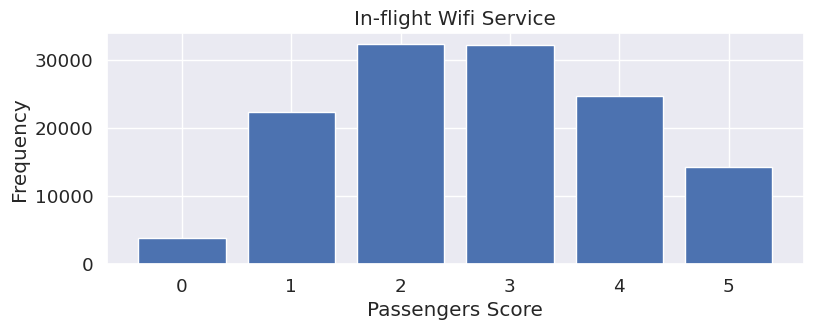

In-flight Wifi Service: 
 2    32236
3    32087
4    24702
1    22250
5    14304
0     3908
Name: In-flight Wifi Service, dtype: int64


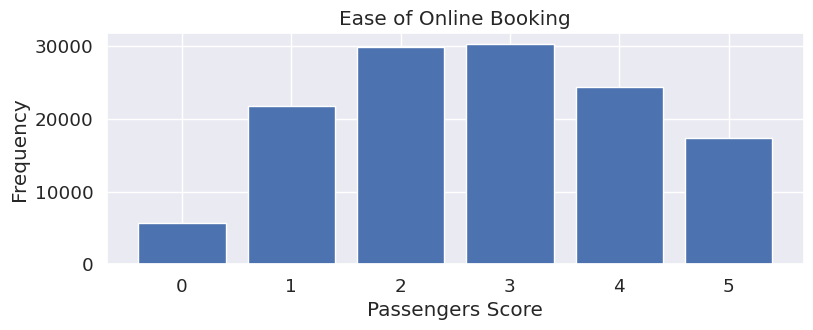

Ease of Online Booking: 
 3    30297
2    29983
4    24362
1    21808
5    17371
0     5666
Name: Ease of Online Booking, dtype: int64


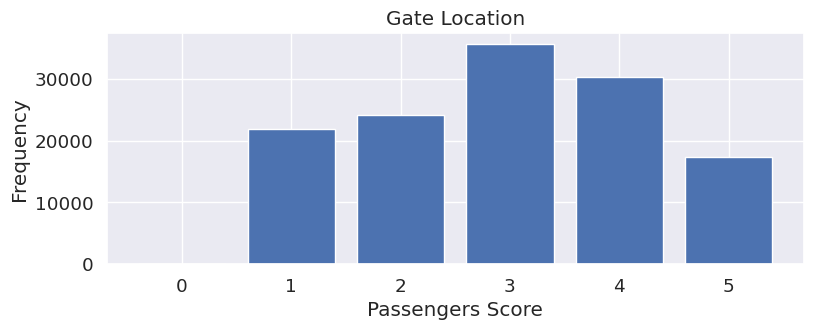

Gate Location: 
 3    35611
4    30376
2    24219
1    21926
5    17354
0        1
Name: Gate Location, dtype: int64


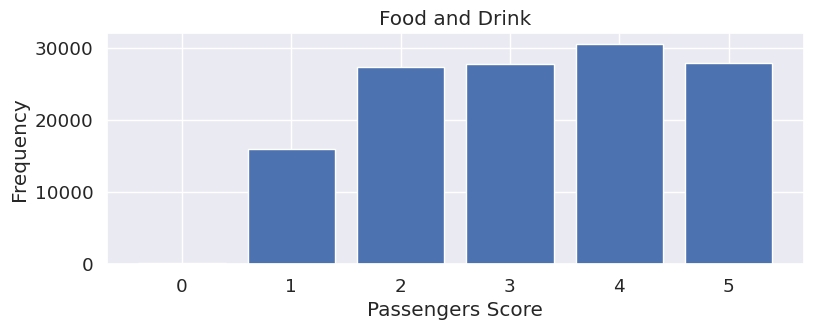

Food and Drink: 
 4    30477
5    27865
3    27712
2    27293
1    16010
0      130
Name: Food and Drink, dtype: int64


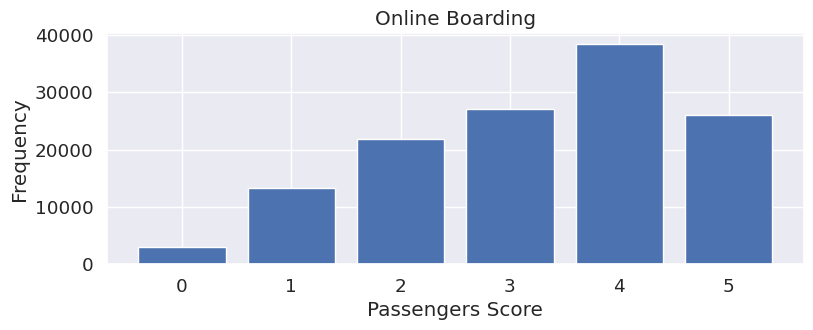

Online Boarding: 
 4    38353
3    27040
5    25941
2    21866
1    13216
0     3071
Name: Online Boarding, dtype: int64


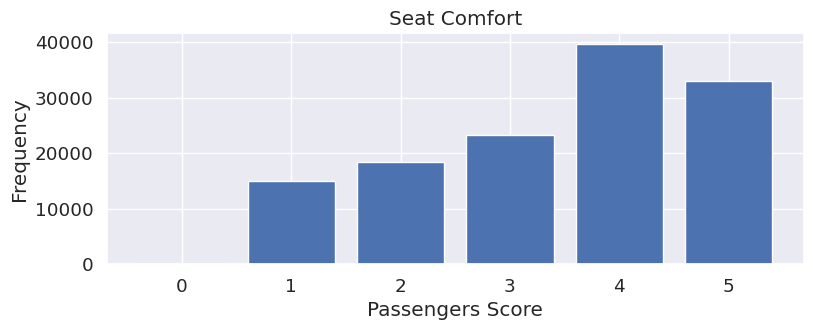

Seat Comfort: 
 4    39651
5    33056
3    23258
2    18462
1    15059
0        1
Name: Seat Comfort, dtype: int64


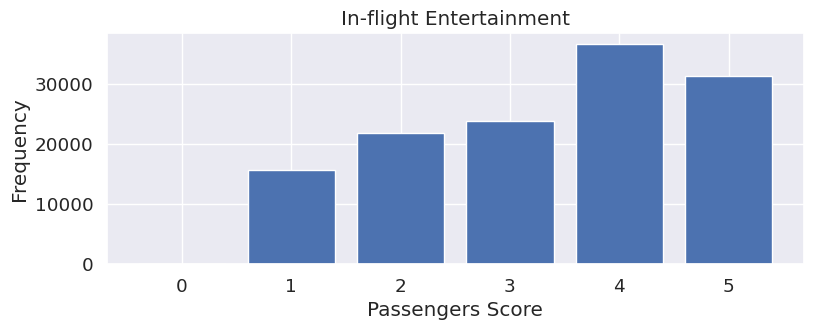

In-flight Entertainment: 
 4    36682
5    31451
3    23805
2    21897
1    15634
0       18
Name: In-flight Entertainment, dtype: int64


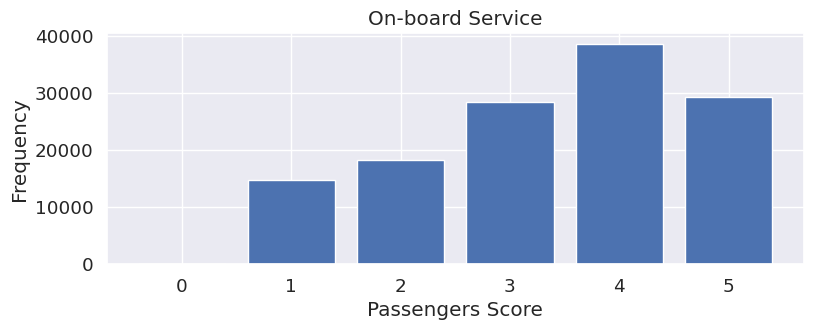

On-board Service: 
 4    38587
5    29407
3    28460
2    18290
1    14738
0        5
Name: On-board Service, dtype: int64


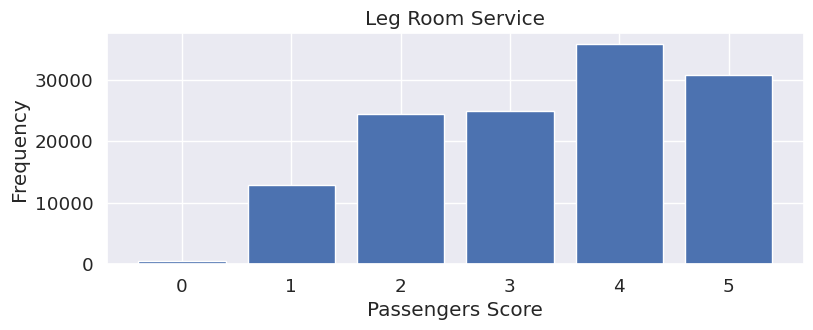

Leg Room Service: 
 4    35779
5    30815
3    24982
2    24469
1    12846
0      596
Name: Leg Room Service, dtype: int64


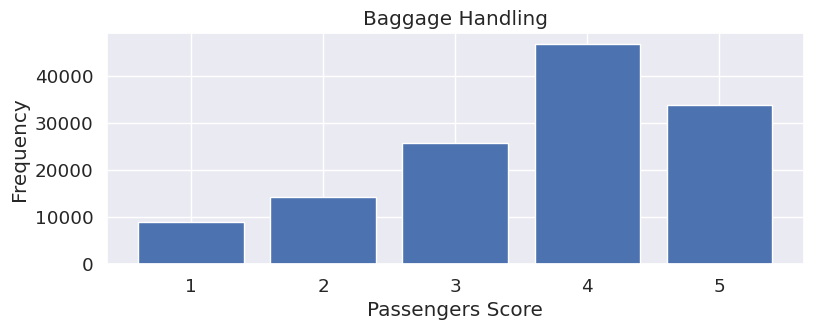

Baggage Handling: 
 4    46631
5    33761
3    25771
2    14316
1     9008
Name: Baggage Handling, dtype: int64


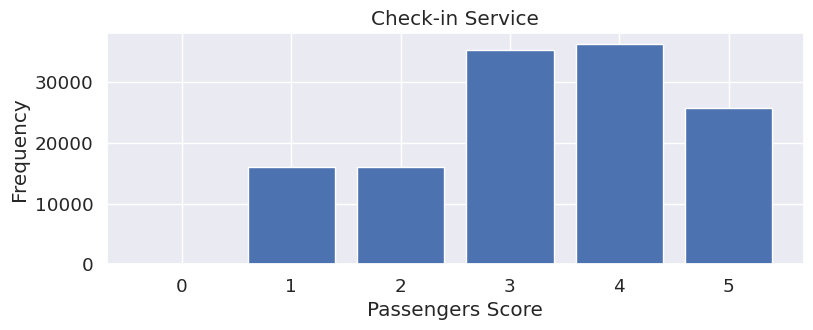

Check-in Service: 
 4    36229
3    35343
5    25800
1    16058
2    16056
0        1
Name: Check-in Service, dtype: int64


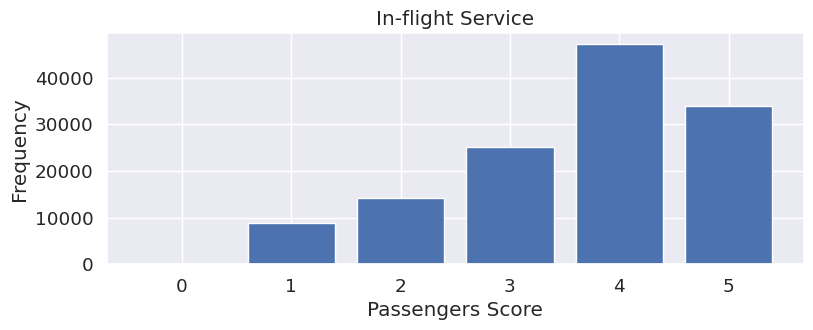

In-flight Service: 
 4    47198
5    33962
3    25232
2    14252
1     8838
0        5
Name: In-flight Service, dtype: int64


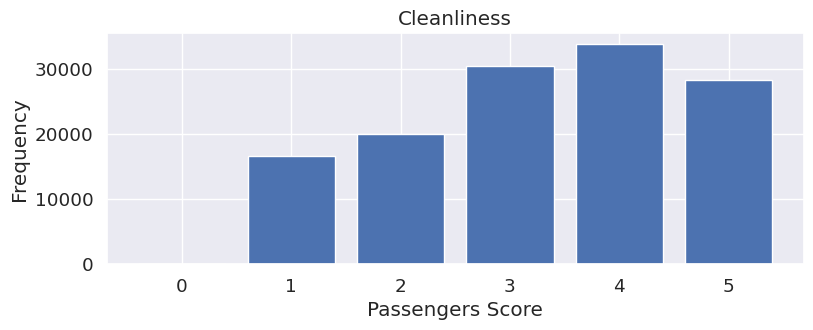

Cleanliness: 
 4    33871
3    30552
5    28321
2    20049
1    16680
0       14
Name: Cleanliness, dtype: int64


In [155]:
category1=["In-flight Wifi Service", "Ease of Online Booking", "Gate Location", "Food and Drink", "Online Boarding", "Seat Comfort", "In-flight Entertainment", "On-board Service", "Leg Room Service", "Baggage Handling", "Check-in Service", "In-flight Service", "Cleanliness",]
for c in category1:
    bar_plot(c)


Categorical 2 Variables:
Gender, Customer Type, Type of Travel, Class, Satisfaction Rating

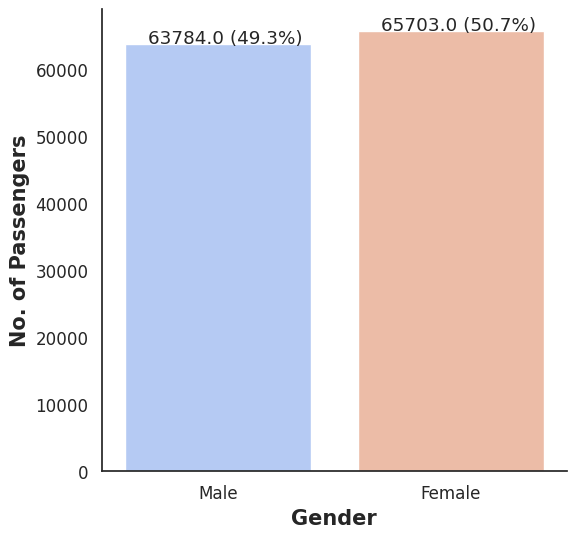

In [156]:
sns.set(style='white',font_scale=1.1)
fig = plt.figure(figsize=[6,6])
ax = sns.countplot(data=df,x='Gender',palette='coolwarm')
ax.set_xticklabels(['Male','Female'])
for p in ax.patches:
        ax.annotate(str(p.get_height())+' ('+str((p.get_height()/len(df)*100).round(1))+'%)', (p.get_x()+0.1, p.get_height()+200))
plt.xlabel('Gender',weight='bold',fontsize='15')
plt.ylabel('No. of Passengers',weight='bold',fontsize='15')
sns.despine()

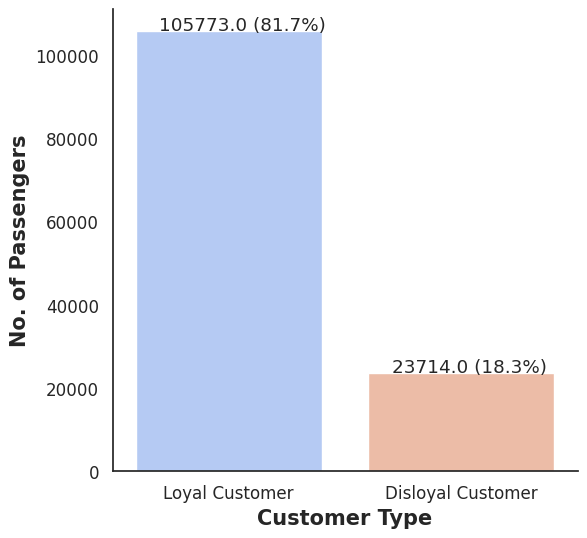

In [157]:
sns.set(style='white',font_scale=1.1)
fig = plt.figure(figsize=[6,6])
ax = sns.countplot(data=df,x='Customer Type',palette='coolwarm')
ax.set_xticklabels(['Loyal Customer','Disloyal Customer'])
for p in ax.patches:
        ax.annotate(str(p.get_height())+' ('+str((p.get_height()/len(df)*100).round(1))+'%)', (p.get_x()+0.1, p.get_height()+200))
plt.xlabel('Customer Type',weight='bold',fontsize='15')
plt.ylabel('No. of Passengers',weight='bold',fontsize='15')
sns.despine()

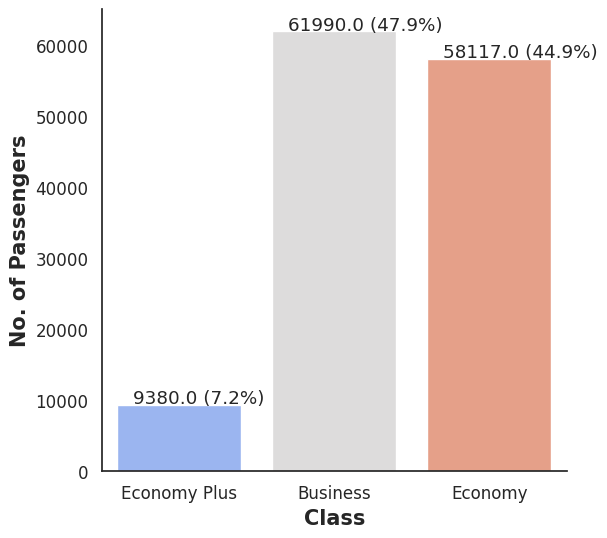

In [158]:
sns.set(style='white',font_scale=1.1)
fig = plt.figure(figsize=[6,6])
ax = sns.countplot(data=df,x='Class',palette='coolwarm')
ax.set_xticklabels(['Economy Plus', 'Business','Economy'])
for p in ax.patches:
        ax.annotate(str(p.get_height())+' ('+str((p.get_height()/len(df)*100).round(1))+'%)', (p.get_x()+0.1, p.get_height()+200))
plt.xlabel('Class',weight='bold',fontsize='15')
plt.ylabel('No. of Passengers',weight='bold',fontsize='15')
sns.despine()


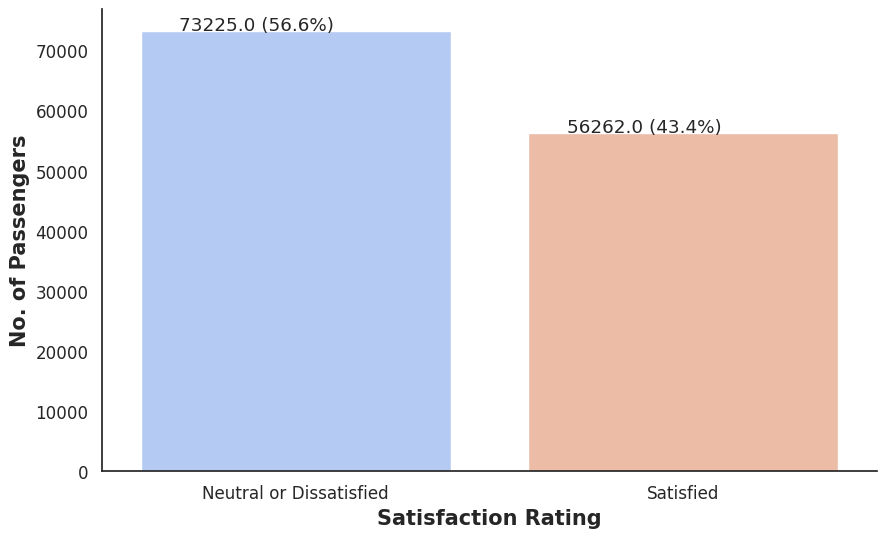

In [159]:
df['Satisfaction Rating'] = df['Satisfaction Rating'].str.strip().str.lower().map({'neutral or dissatisfied': 'Dissatisfied', 'satisfied': 'Satisfied'})

sns.set(style='white', font_scale=1.1)
fig, ax = plt.subplots(figsize=[10, 6])

ax = sns.countplot(data=df, x='Satisfaction Rating', palette='coolwarm')

for p in ax.patches:
    ax.annotate(str(p.get_height()) + ' (' + str((p.get_height() / len(df) * 100).round(1)) + '%)',
                (p.get_x() + 0.1, p.get_height() + 200))

ax.set_xticklabels(['Neutral or Dissatisfied', 'Satisfied'])

plt.xlabel('Satisfaction Rating', weight='bold', fontsize='15')
plt.ylabel('No. of Passengers', weight='bold', fontsize='15')
sns.despine()
plt.show()


In [160]:
category2=["Gender", "Customer Type", "Type of Travel", "Class", "Satisfaction Rating"]
for c in category2:
    print("{} \n".format(df[c].value_counts()))

Female    65703
Male      63784
Name: Gender, dtype: int64 

Loyal Customer       105773
disloyal Customer     23714
Name: Customer Type, dtype: int64 

Business travel    89445
Personal Travel    40042
Name: Type of Travel, dtype: int64 

Business    61990
Eco         58117
Eco Plus     9380
Name: Class, dtype: int64 

Dissatisfied    73225
Satisfied       56262
Name: Satisfaction Rating, dtype: int64 



From the count plot, we can observ that number of female air passangers are more than that of male passengers.

From the count plot, we can observed that the Loyal customers are more than of Disloyal customers.

From the count plot, we can observed that Business travel passengers are more than the personal travel passengers.

From the count plot, we can observed that Business class passengers than the Economy class passengers and Economy Plus passengers.

From the count plot, we can observed that neutral/dissatisfied passengers are more than satisfied customers.

Numerical Variables:
Age, Flight Distance, Departure Delay, Arrival Delay

In [161]:
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(df[variable],bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with histogram".format(variable))
    plt.show()

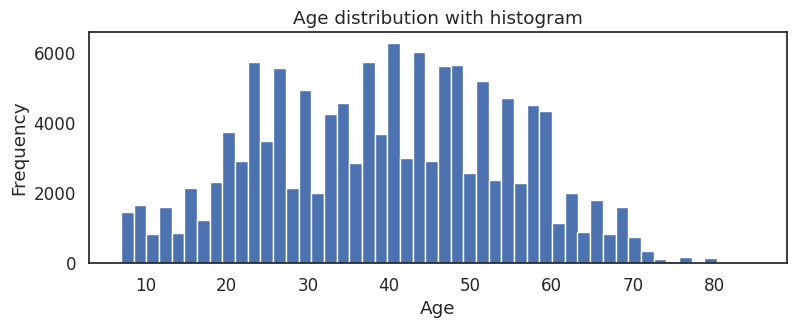

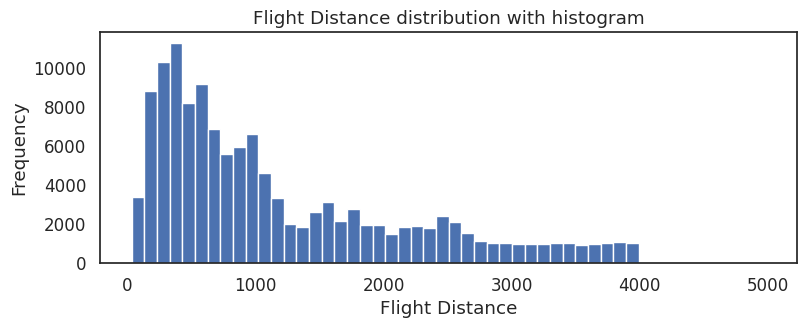

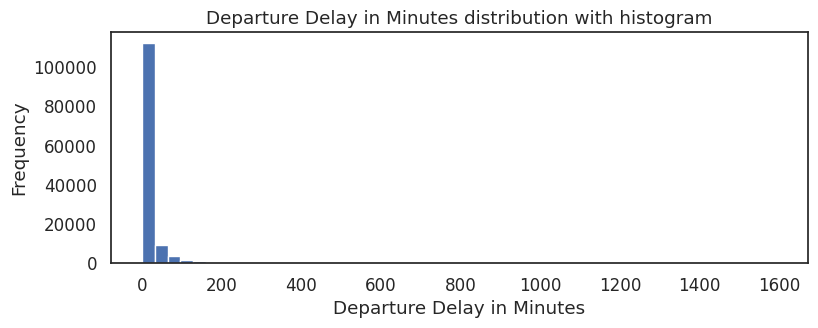

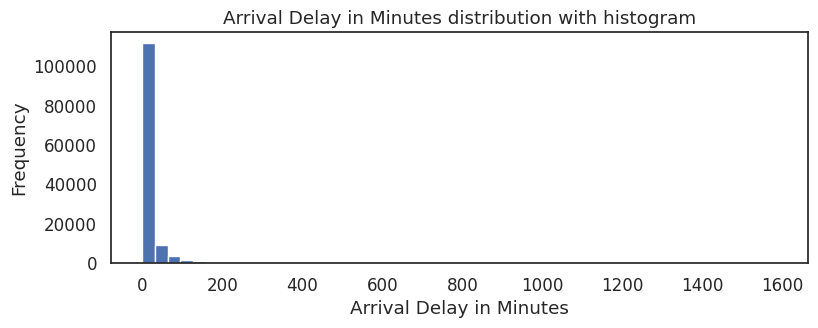

In [162]:
numericVar=["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]

for n in numericVar:
    plot_hist(n)

In [163]:
df = df.rename(columns={'Customer Type':'Customer_Type','Type of Travel':'Travel_Type','Flight Distance':'Flight_Distance',
                   'Inflight wifi service':'Wifi_Service','Departure/Arrival time convenient':'Departure_Arrival_Time',
                   'Ease of Online booking':'Online_Booking','Gate location':'Gate_Location','Food and drink':'Food_Drink',
                   'Online boarding':'Online_Boarding','Seat comfort':'Seat_Comfort','Inflight entertainment':'Inflight_Entertainment',
                   'On-board service':'Onboard_Service','Leg room service':'LegRoom_Service','Baggage handling':'Baggage_Handling',
                   'Checkin service':'Checking_Service','Inflight service':'Inflight_Service','Departure Delay in Minutes':'Departure_Delay_Time',
                   'Arrival Delay in Minutes':'Arrival_Delay_Time'})
df.head()

,Gender,Customer_Type,Age,Travel_Type,Class,Flight_Distance,In-flight Wifi Service,Departure and Arrival Time Convenience,Ease of Online Booking,Gate Location,Food and Drink,Online Boarding,Seat Comfort,In-flight Entertainment,On-board Service,Leg Room Service,Baggage Handling,Check-in Service,In-flight Service,Cleanliness,Departure_Delay_Time,Arrival_Delay_Time,Satisfaction Rating
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,Dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,Dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,Satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,Dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,Satisfied


**Corrleation Matrix**

Text(0.5, 1.0, 'Bar Plot between satisfaction and Age variable')

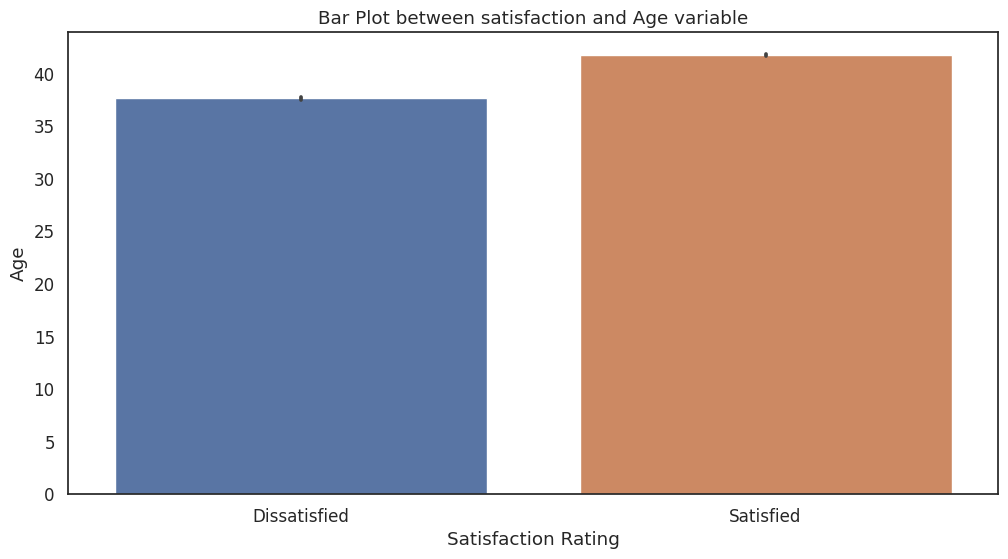

In [164]:
sns.set(style='white',font_scale=1.1)
plt.figure(figsize = (12,6))
sns.barplot(x='Satisfaction Rating',y='Age', data=df)
plt.title('Bar Plot between satisfaction and Age variable')

From the bar chart, we can observe that the average age of satisfied passengers is around 42, and the average age of dissatisfied passengers is around 37.

Text(0.5, 1.0, 'Bar Plot between Gender and Age variable')

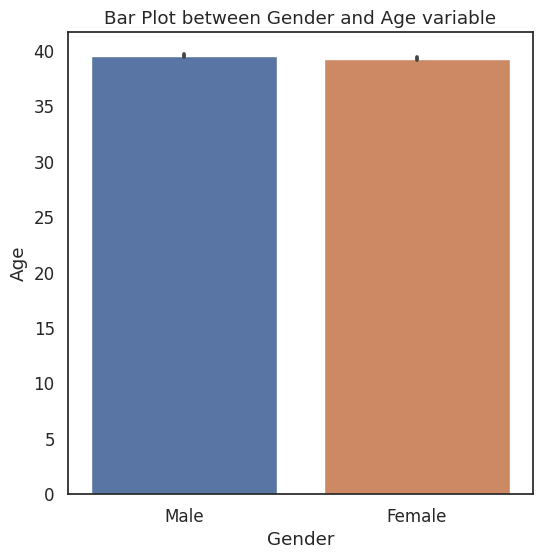

In [165]:
sns.set(style='white',font_scale=1.1)
plt.figure(figsize = (6,6))
sns.barplot(x='Gender',y='Age', data=df)
plt.title('Bar Plot between Gender and Age variable')

We can observe that the average age of both Female and Male passengers is around 39.

Text(0.5, 1.0, 'Bar Plot between customer type and Age variable')

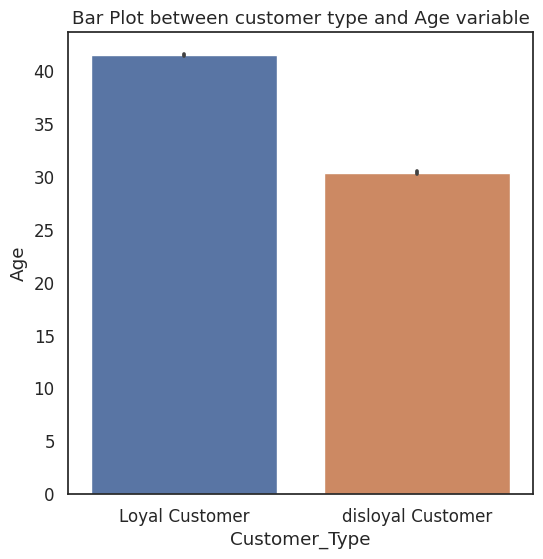

In [166]:
sns.set(style='white',font_scale=1.1)
plt.figure(figsize = (6,6))
sns.barplot(x='Customer_Type',y='Age', data=df)
plt.title('Bar Plot between customer type and Age variable')

We can observe that the average age of Loyal customers is around 41 and the Disloyal customers is around 30

Text(0.5, 1.0, 'Bar Plot between Travel Type and Age variable')

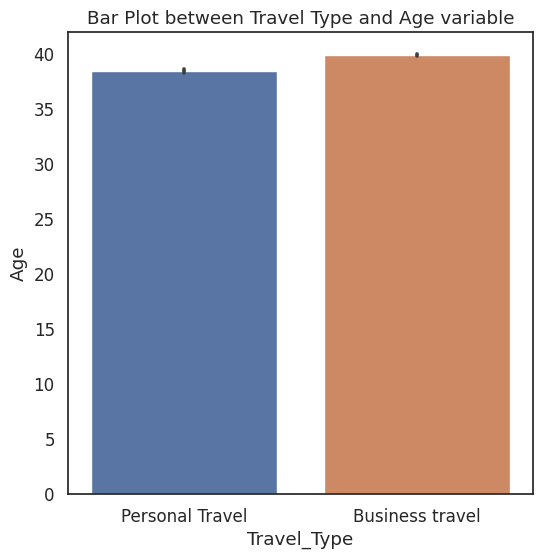

In [122]:
sns.set(style='white',font_scale=1.1)
plt.figure(figsize = (6,6))
sns.barplot(x='Travel_Type',y='Age', data=df)
plt.title('Bar Plot between Travel Type and Age variable')

we can observe that the average age of business travel passengers is around 39 and the personal travel passengers is around 38.

Text(0.5, 1.0, 'Bar Plot between Class and Age variable ')

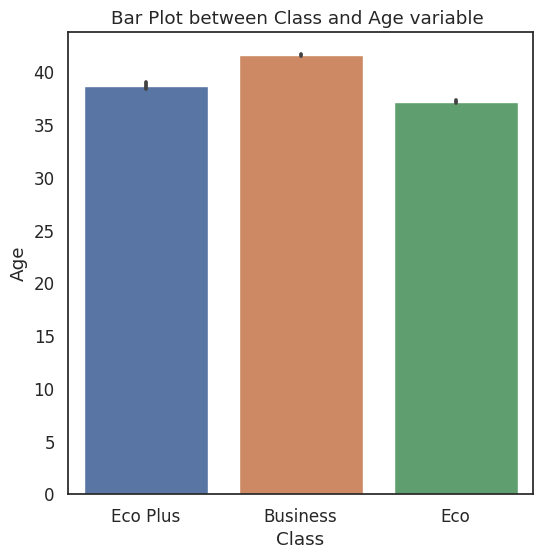

In [123]:
sns.set(style='white',font_scale=1.1)
plt.figure(figsize = (6, 6))
sns.barplot(x='Class',y='Age', data=df)
plt.title('Bar Plot between Class and Age variable ')

We can observe that the average age of Economy class passengers is around 37, the average age of Business class passengers is around 40 and the average age of Economy Plus passengers is around 38.

**Detecting Outliers**

In [124]:
numerical_features = df
numerical_features.columns

Index(['Gender', 'Customer_Type', 'Age', 'Travel_Type', 'Class',
       'Flight_Distance', 'In-flight Wifi Service',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Gate Location', 'Food and Drink', 'Online Boarding', 'Seat Comfort',
       'In-flight Entertainment', 'On-board Service', 'Leg Room Service',
       'Baggage Handling', 'Check-in Service', 'In-flight Service',
       'Cleanliness', 'Departure_Delay_Time', 'Arrival_Delay_Time',
       'Satisfaction Rating'],
      dtype='object')

**No outliers are present in the variables**, Age, Departure and Arrival Time Convenience, Ease of Online Booking, Gate Location, Seat Comfort, Leg Room Service, Cleanliness, Food and Drink, In-flight Service, In-flight Wifi Service, In-flight Entertainment, Baggage Handling.

**Outliers are present in the variables**, Flight_Distance, Departure_Delay_Time, Arrival_Delay_Time,Check-in Service, Online Boarding, On-board Service. But, for this kind of dataset we can ignore outlier analysis and not so important.

Encoding the Categorical variables

In [125]:
# Encoding Target variable
le = LabelEncoder()
df['Satisfaction Rating'] = le.fit_transform(df['Satisfaction Rating'])

# Convert to integer
df['Satisfaction Rating'] = df['Satisfaction Rating'].astype(int)

# Display the resulting DataFrame
print(df['Satisfaction Rating'])

0         0
1         0
2         1
3         0
4         1
         ..
129875    0
129876    1
129877    0
129878    1
129879    0
Name: Satisfaction Rating, Length: 129487, dtype: int64


In [126]:
# Encoding other variables
df_encoded = pd.get_dummies(df,columns=['Gender','Customer_Type','Travel_Type','Class'])
df_encoded

,Age,Flight_Distance,In-flight Wifi Service,Departure and Arrival Time Convenience,Ease of Online Booking,Gate Location,Food and Drink,Online Boarding,Seat Comfort,In-flight Entertainment,On-board Service,Leg Room Service,Baggage Handling,Check-in Service,In-flight Service,Cleanliness,Departure_Delay_Time,Arrival_Delay_Time,Satisfaction Rating,Gender_Female,Gender_Male,Customer_Type_Loyal Customer,Customer_Type_disloyal Customer,Travel_Type_Business travel,Travel_Type_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,0,1,1,0,0,1,0,0,1
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,0,1,0,1,1,0,1,0,0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,1,0,1,0,1,0,1,0,0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0,1,0,1,0,1,0,1,0,0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1,0,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,34,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,0,0,1,0,1,1,0,1,0,0
129876,23,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,1,0,1,1,0,1,0,1,0,0
129877,17,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,0,1,0,1,0,0,1,0,1,0
129878,14,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,1,0,1,1,0,1,0,1,0,0


In [127]:
corr_matrix = df.corr()
corr_matrix

,Age,Flight_Distance,In-flight Wifi Service,Departure and Arrival Time Convenience,Ease of Online Booking,Gate Location,Food and Drink,Online Boarding,Seat Comfort,In-flight Entertainment,On-board Service,Leg Room Service,Baggage Handling,Check-in Service,In-flight Service,Cleanliness,Departure_Delay_Time,Arrival_Delay_Time,Satisfaction Rating
Age,1.000000,0.099863,0.015779,0.036780,0.022294,-0.000709,0.023283,0.207485,0.159229,0.074990,0.056743,0.038992,-0.048192,0.033182,-0.051778,0.052575,-0.009263,-0.011248,0.134001
Flight_Distance,0.099863,1.000000,0.006554,-0.018901,0.064959,0.005378,0.057136,0.215082,0.157825,0.130518,0.111224,0.134548,0.064810,0.073635,0.059182,0.095658,0.001992,-0.001935,0.298206
In-flight Wifi Service,0.015779,0.006554,1.000000,0.344846,0.714888,0.338547,0.132109,0.457422,0.121373,0.207887,0.120028,0.160414,0.120548,0.043847,0.110300,0.131163,-0.016046,-0.017749,0.283291
Departure and Arrival Time Convenience,0.036780,-0.018901,0.344846,1.000000,0.437697,0.447411,0.001057,0.072175,0.008707,-0.008189,0.067046,0.010634,0.070646,0.091217,0.072166,0.010021,0.000610,-0.000942,-0.054457
Ease of Online Booking,0.022294,0.064959,0.714888,0.437697,1.000000,0.460155,0.030638,0.404944,0.028602,0.046669,0.039039,0.109341,0.039215,0.008835,0.035356,0.015150,-0.005330,-0.007033,0.168704
Gate Location,-0.000709,0.005378,0.338547,0.447411,0.460155,1.000000,-0.002825,0.002579,0.002493,0.002751,-0.029109,-0.005146,0.001097,-0.039294,0.000337,-0.006066,0.005943,0.005658,-0.002923
Food and Drink,0.023283,0.057136,0.132109,0.001057,0.030638,-0.002825,1.000000,0.233524,0.575993,0.623366,0.057476,0.033215,0.035413,0.085103,0.035424,0.658026,-0.029351,-0.031715,0.211164
Online Boarding,0.207485,0.215082,0.457422,0.072175,0.404944,0.002579,0.233524,1.000000,0.419169,0.284008,0.154272,0.123149,0.083563,0.204215,0.073973,0.329331,-0.019319,-0.022730,0.501620
Seat Comfort,0.159229,0.157825,0.121373,0.008707,0.028602,0.002493,0.575993,0.419169,1.000000,0.611949,0.130654,0.104244,0.074617,0.189838,0.068912,0.679657,-0.027711,-0.030521,0.348576
In-flight Entertainment,0.074990,0.130518,0.207887,-0.008189,0.046669,0.002751,0.623366,0.284008,0.611949,1.000000,0.418863,0.300573,0.379291,0.119664,0.406561,0.692491,-0.027166,-0.030230,0.398334


Text(0.5, 1.0, 'Correlation Heatmap')

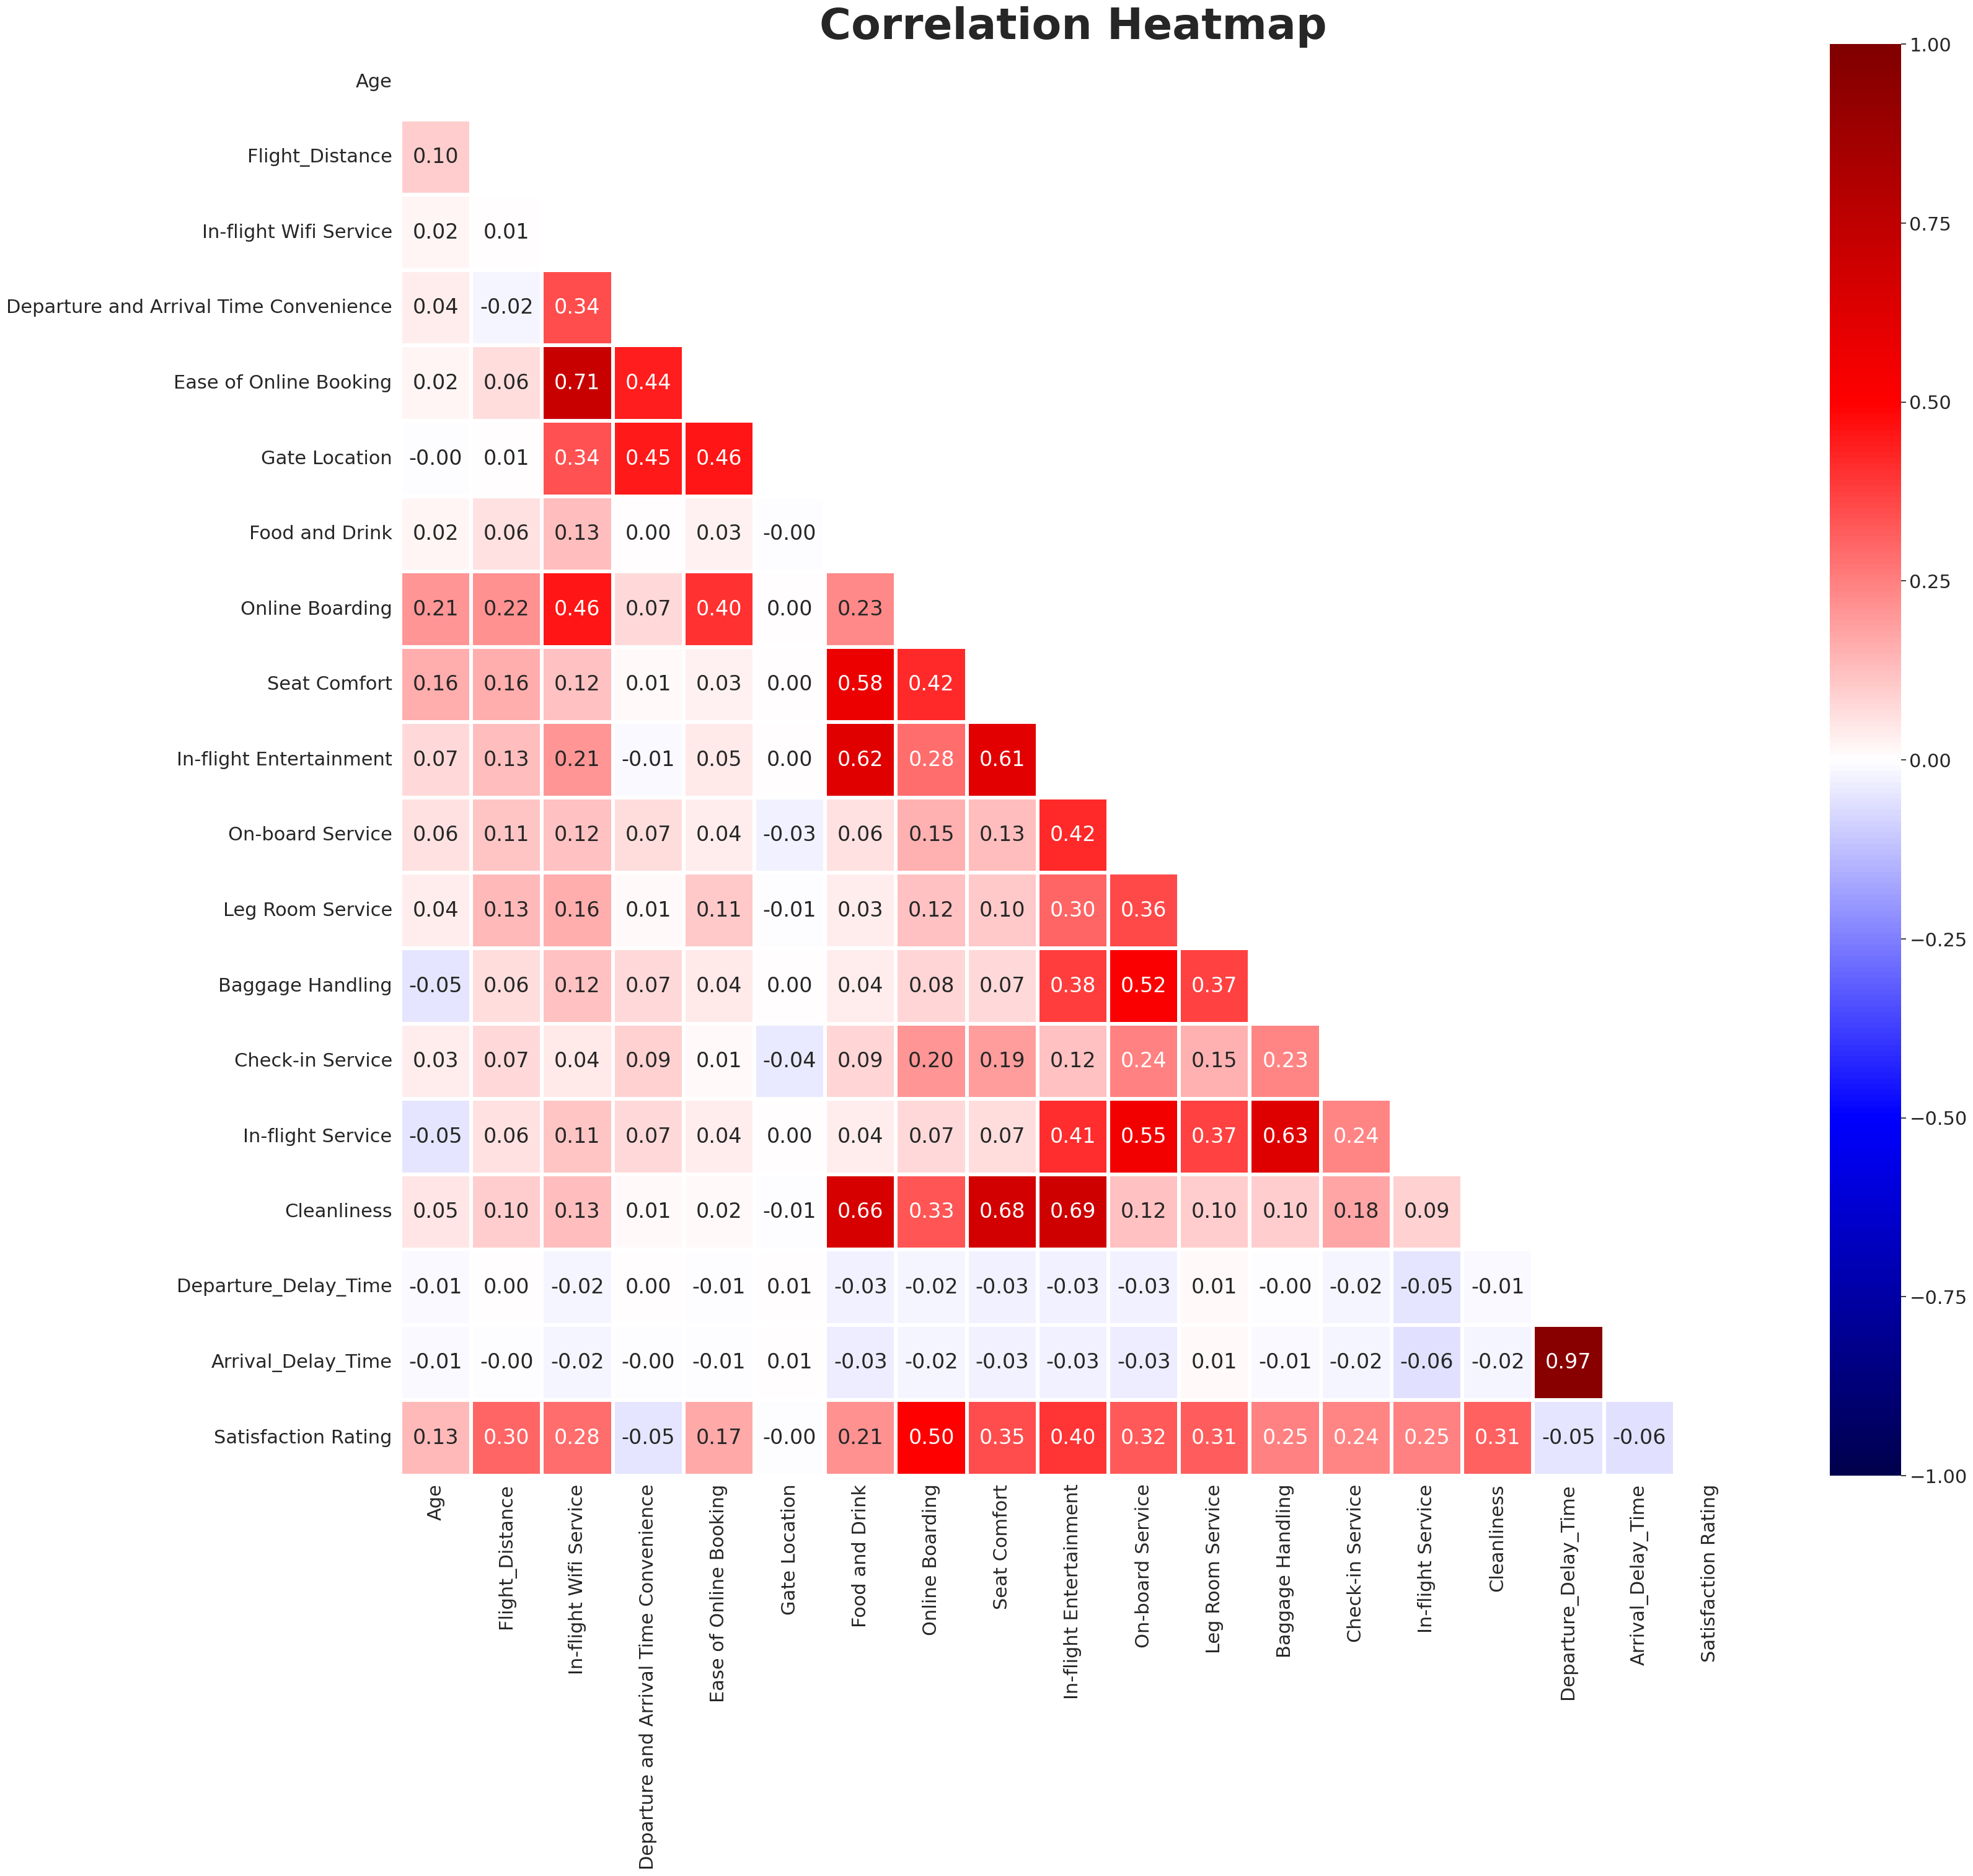

In [128]:
sns.set(style='white',font_scale=2)
fig = plt.figure(figsize=[35,30])
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(150, 0, as_cmap=True)
sns.heatmap(corr_matrix,cmap='seismic',linewidth=3,linecolor='white',vmax = 1, vmin=-1,mask=mask, annot=True,fmt='0.2f')
plt.title('Correlation Heatmap', weight='bold',fontsize=50)

In [129]:
X = df_encoded.iloc[:, 0:27].values
Y = df_encoded.iloc[:,18].values

In [130]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 28 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Age                                     129487 non-null  int64  
 1   Flight_Distance                         129487 non-null  int64  
 2   In-flight Wifi Service                  129487 non-null  int64  
 3   Departure and Arrival Time Convenience  129487 non-null  int64  
 4   Ease of Online Booking                  129487 non-null  int64  
 5   Gate Location                           129487 non-null  int64  
 6   Food and Drink                          129487 non-null  int64  
 7   Online Boarding                         129487 non-null  int64  
 8   Seat Comfort                            129487 non-null  int64  
 9   In-flight Entertainment                 129487 non-null  int64  
 10  On-board Service                        1294

Split dataset into train and test

In [131]:
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,13.0,460.0,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,25.0,235.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,6.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
2,26.0,1142.0,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,25.0,562.0,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,9.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,61.0,214.0,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,34.0,526.0,3.0,3.0,3.0,1.0,4.0,3.0,4.0,4.0,3.0,2.0,4.0,4.0,5.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
129483,23.0,646.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
129484,17.0,828.0,2.0,5.0,1.0,5.0,2.0,1.0,2.0,2.0,4.0,3.0,4.0,5.0,4.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
129485,14.0,1127.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,3.0,2.0,5.0,4.0,5.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


In [132]:
Y = pd.DataFrame(Y)
Y

,0
0,0
1,0
2,1
3,0
4,1
...,...
129482,0
129483,1
129484,0
129485,1


In [133]:
# Count missing values in 'Customer Satisfaction' column
missing_values = df['Satisfaction Rating'].isna().sum()

# Print the count of missing values
print("Number of missing values in 'Customer Satisfaction':", missing_values)


Number of missing values in 'Customer Satisfaction': 0


In [134]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.40, random_state = 0)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'Y_train shape: {Y_train.shape}')
print(f'Y_test shape: {Y_test.shape}')

X_train shape: (77692, 27)
X_test shape: (51795, 27)
Y_train shape: (77692, 1)
Y_test shape: (51795, 1)


In [135]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model building

# K Nearest Neighbors Classfier

[0]Logistic Regression Training Accuracy: 0.9969494928692787
Accuracy: 0.9940727869485472
Balanced Accuracy Score: 0.9932557506083457
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     29387
           1       1.00      0.99      0.99     22408

    accuracy                           0.99     51795
   macro avg       0.99      0.99      0.99     51795
weighted avg       0.99      0.99      0.99     51795

Confusion Matrix:
[[29367    20]
 [  287 22121]]


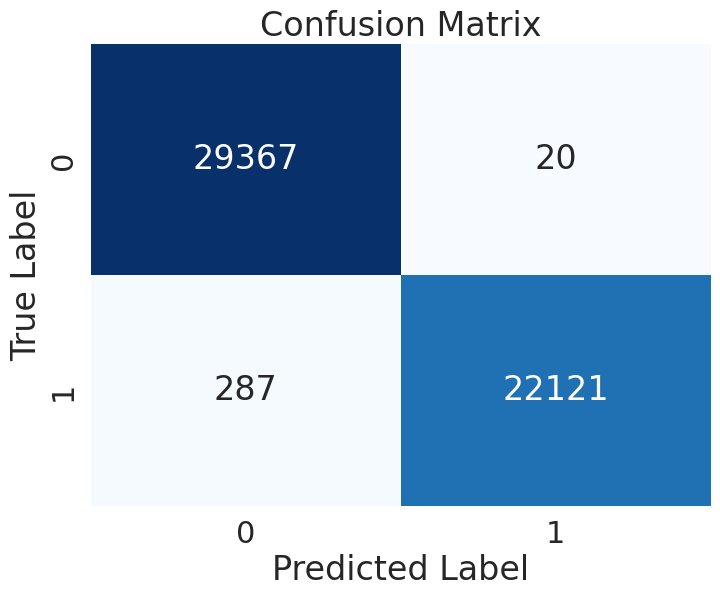

In [136]:
# Fit the model
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, Y_train)

# Get predictions
y_pred = knn.predict(X_test)

# Print accuracy metrics
print('[0]Logistic Regression Training Accuracy:', knn.score(X_train, Y_train))
print('Accuracy:', accuracy_score(Y_test, y_pred))
print('Balanced Accuracy Score:', balanced_accuracy_score(Y_test, y_pred))
print('Classification Report:')
print(classification_report(Y_test, y_pred))

# Print confusion matrix
conf_mat = confusion_matrix(Y_test, y_pred)
print('Confusion Matrix:')
print(conf_mat)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Decision Tree Classifier

[0]Logistic Regression Training Accuracy: 1.0
Accuracy: 1.0
Balanced Accuracy Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29387
           1       1.00      1.00      1.00     22408

    accuracy                           1.00     51795
   macro avg       1.00      1.00      1.00     51795
weighted avg       1.00      1.00      1.00     51795

Confusion Matrix:
[[29387     0]
 [    0 22408]]


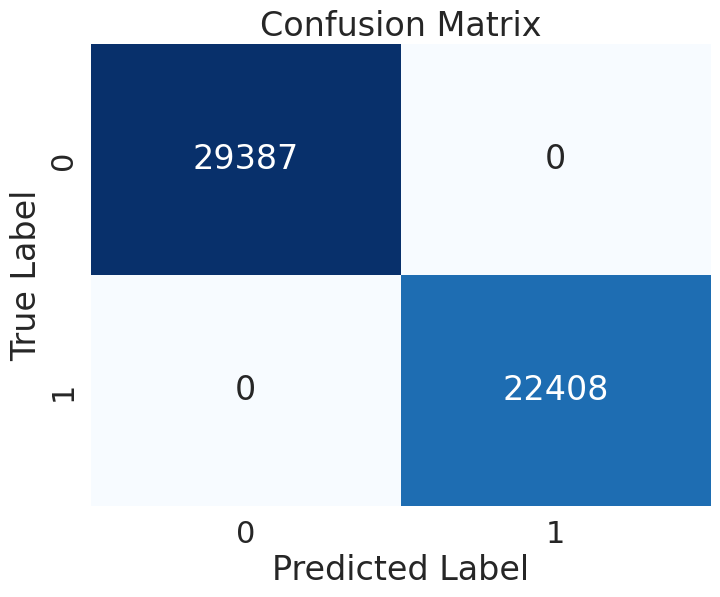

In [137]:
# Fit the model
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, Y_train)

# Get predictions
y_pred = tree.predict(X_test)

# Print accuracy metrics
print('[0]Logistic Regression Training Accuracy:', tree.score(X_train, Y_train))
print('Accuracy:', accuracy_score(Y_test, y_pred))
print('Balanced Accuracy Score:', balanced_accuracy_score(Y_test, y_pred))
print('Classification Report:')
print(classification_report(Y_test, y_pred))

# Print confusion matrix
conf_mat = confusion_matrix(Y_test, y_pred)
print('Confusion Matrix:')
print(conf_mat)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Random Forest Classifier

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=10)
[0]Random Forest Training Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29387
           1       1.00      1.00      1.00     22408

    accuracy                           1.00     51795
   macro avg       1.00      1.00      1.00     51795
weighted avg       1.00      1.00      1.00     51795

Accuracy: 1.0
Balanced Accuracy Score: 1.0
Confusion Matrix:
[[29387     0]
 [    0 22408]]


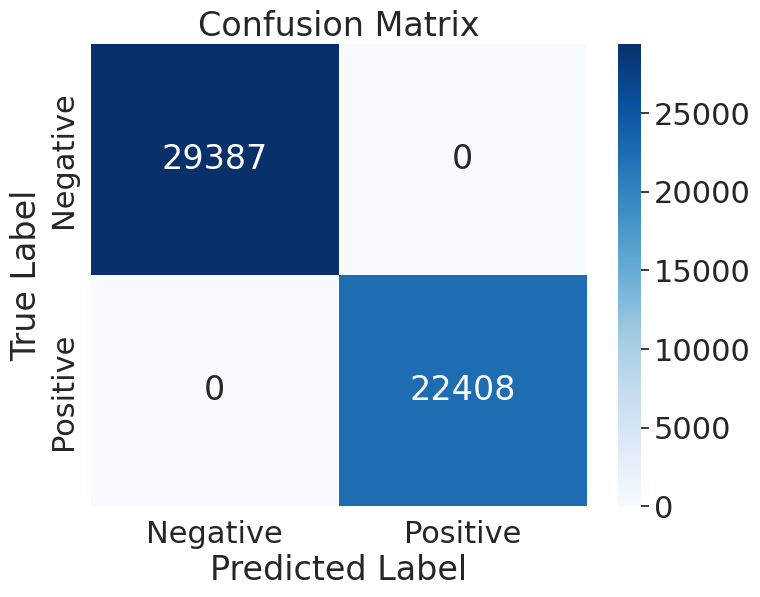

In [138]:
# Create RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=10)
print(forest.fit(X_train, Y_train))
print('[0]Random Forest Training Accuracy:', forest.score(X_train, Y_train))

# Check Accuracy precision, recall, f1-score
print(classification_report(Y_test, forest.predict(X_test)))

# Another way to get the model's accuracy on the test data
print(F'Accuracy:', accuracy_score(Y_test, forest.predict(X_test)))
print(F'Balanced Accuracy Score:', balanced_accuracy_score(Y_test, forest.predict(X_test)))
print(F'Confusion Matrix:')
print(confusion_matrix(Y_test, forest.predict(X_test)))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(Y_test, forest.predict(X_test)), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()